# Gapminder Dataset
To predict the life expectancy in a given country based on features such as GDP, fertility rate, and population.

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [8]:
df = pd.read_csv('datasets/gm_2008_region.csv')
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


# EDA

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
population         139 non-null float64
fertility          139 non-null float64
HIV                139 non-null float64
CO2                139 non-null float64
BMI_male           139 non-null float64
GDP                139 non-null float64
BMI_female         139 non-null float64
life               139 non-null float64
child_mortality    139 non-null float64
Region             139 non-null object
dtypes: float64(9), object(1)
memory usage: 10.9+ KB


In [5]:
df.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


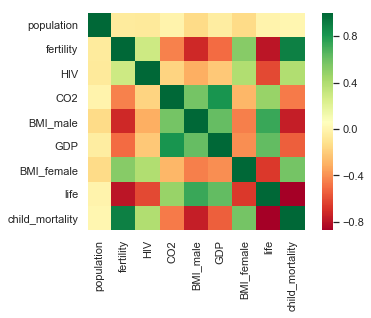

In [21]:
# Correlation matrix
sns.set()
sns.heatmap(df.corr(), cmap='RdYlGn', square=True);

# Fit a linear regression with one feature
**fertility:** the average number of children a woman in a given country gives birth to.

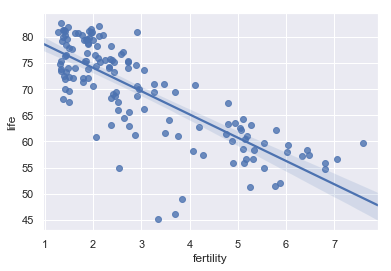

In [25]:
sns.regplot(data=df, x='fertility', y='life');

In [18]:
X_fertility = df['fertility'].values.reshape(-1, 1)
y = df['life'].values.reshape(-1, 1)

In [34]:
reg = LinearRegression()

prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1, 1)

# fit the model
reg.fit(X_fertility, y)

# Compute prediction over the prediction space
y_pred = reg.predict(prediction_space)

print('R-squared: {}'.format(reg.score(X_fertility, y)))

R-squared: 0.6192442167740035


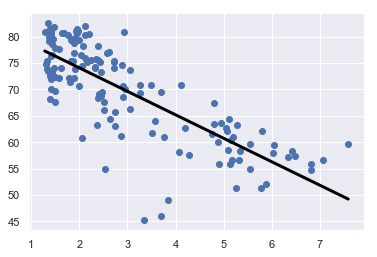

In [35]:
# manual plot the regression line
plt.scatter(X_fertility, y)
plt.plot(prediction_space, y_pred, color='black', linewidth=3);

# Train/test split for regression

In [53]:
X = df.drop(['Region','life'], axis=1).values
y = df['life'].values

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
        test_size=0.3, random_state=42)

# Create the regressor
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)


print('Coefficients: {}'.format(reg_all.coef_))
print('Intercept: {}'.format(reg_all.intercept_))

Coefficients: [-2.03205166e-09 -3.30810286e-01 -7.21234146e-01 -1.47522293e-01
  4.93199538e-01  1.37767248e-04 -2.52417353e-01 -8.67212952e-02]
Intercept: 94.03778829994867


## Predict and compute $R^2$ and $RSME$

$RMSError = \sqrt{\frac{\sum_{i=1}^{n}(\hat{y_i} - y_i)^2}{n}}$

In [54]:
# Predict on the test data
y_pred = reg_all.predict(X_test)

# Compute and print R-squared and RMSE
print('R^2: {}'.format(reg_all.score(X_test, y_test)))

rsme = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: {}'.format(rsme))

R^2: 0.838046873142936
Root Mean Squared Error: 3.2476010800377213


In [58]:
np.sqrt(np.mean((y_test - y_pred)**2))

3.2476010800377213